# E-retail factors for customer activation and retention:

A case study from Indian e-commerce customers Customer satisfaction has emerged as one of the most important factors that guarantee the success of online store; it has been posited as a key stimulant of purchase, repurchase intentions and customer loyalty. A comprehensive review of the literature, theories and models have been carried out to propose the models for customer activation and customer retention. Five major factors that contributed to the success of an e-commerce store have been identified as: service quality, system quality, information quality, trust and net benefit. The research furthermore investigated the factors that influence the online customers repeat purchase intention. The combination of both utilitarian value and hedonistic values are needed to affect the repeat purchase intention (loyalty) positively. The data is collected from the Indian online shoppers. Results indicate the e-retail success factors, which are very much critical for customer satisfaction.

Be careful: There are two sheets (one is detailed) and second is encoded in the excel file. You may use any of them by extracting in separate excel sheet. The number of column(s) is more than 47. Read the column header carefully.

Note : Data Scientists have to apply their analytical skills to give findings and conclusions in detailed data analysis written in jupyter notebook . Only data analysis is required. Need not to create machine learning models /but still if anybody comes with it that is welcome.

In [1]:
import pandas as pd        # for data manipulation
import numpy as np         # for mathematical calculations
import seaborn as sns      # for data visualization

import matplotlib.pyplot as plt  #for graphical analysis
%matplotlib inline

from scipy.stats import zscore # to remove outliers

from sklearn.preprocessing import StandardScaler  # for normalize the model
from sklearn.preprocessing import LabelEncoder  # to convert object into int


from sklearn.model_selection import train_test_split  # for train and test model

import warnings                      # to ignore any warnings
warnings.filterwarnings("ignore")

from sklearn import metrics  # for model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix, classification_report

# Load Dataset

In [2]:
data=pd.read_excel('customer_retention_dataset.xlsx',sheet_name=0)  # read the data
data

1Gender of respondent 2 How old are you?   \
0                    Male         31-40 years   
1                  Female         21-30 years   
2                  Female         21-30 years   
3                    Male         21-30 years   
4                  Female         21-30 years   
..                    ...                 ...   
264                Female         21-30 years   
265                Female         31-40 years   
266                Female         41-50 yaers   
267                Female  Less than 20 years   
268                Female         41-50 yaers   

    3 Which city do you shop online from?  \
0                                   Delhi   
1                                   Delhi   
2                           Greater Noida   
3                                 Karnal    
4                              Bangalore    
..                                    ...   
264                                 Solan   
265                             Ghaziabad   
266                            Bangalore    
267                                 Solan   
268                             Ghaziabad   

     4 What is the Pin Code of where you shop online from?  \
0                                               110009       
1                                               110030       
2                                               201308       
3                                               132001       
4                                               530068       
..                                                 ...       
264                                             173212       
265                                             201008       
266                                             560010       
267                                             173229       
268                                             201009       

    5 Since How Long You are Shopping Online ?  \
0                                Above 4 years   
1                                Above 4 years   
2                                    3-4 years   
3                                    3-4 years   
4                                    2-3 years   
..                                         ...   
264                                  1-2 years   
265                                  1-2 years   
266                                  2-3 years   
267                                  2-3 years   
268                                  2-3 years   

    6 How many times you have made an online purchase in the past 1 year?  \
0                                          31-40 times                      
1                                   41 times and above                      
2                                   41 times and above                      
3                                   Less than 10 times                      
4                                          11-20 times                      
..                                                 ...                      
264                                 Less than 10 times                      
265                                        31-40 times                      
266                                 Less than 10 times                      
267                                 Less than 10 times                      
268                                        31-40 times                      

    7 How do you access the internet while shopping on-line?  \
0                                              Dial-up         
1                                                Wi-Fi         
2                                      Mobile Internet         
3                                      Mobile Internet         
4                                                Wi-Fi         
..                                                 ...         
264                                    Mobile Internet         
265                                    Mobile Internet         
266                        

As we see there is too long name of the columns so, lets frist rename the columns for further treatment or procedure.

In [3]:
# Rename the columns of dataset for better treatment
data.columns=['gender','age','city','pin','year','shop_past_year','InternetService','deviceService','screen_size','OS','browser','channel','how_reach','explore_time','pat_mode','empty_cart_time','abandon_bag','easy_content','pro_comp','comp_info','cleary_info','easy_navi','speed','user_fri','conv_pay','trust','empathy','privacy','communication','benefit','enjoyment','conv_flexi','return_policy','loyalty','quality_info','satisfaction','Net_Benefit','sat_withoutTrust','off_variety','pro_comp_info','savings','patronizing','sense_advan','enhances_social','gratification','fulfill_certain_roles','value_money','online_retailers','easy_website','Visual_web-page','Wild_variety_offer','relevant_info','fast_website','Reliability_web','Quickness_web','several_ payment','Speedy_delivery','Privacy_info','Secu_finan_info','Trustworthiness','online_assist','Longer_time_logIn','Longer_time_photo','Late_declaration','loading_time','limited_pay_mode','Longer_delivery','app_design','Frequent_disruption','efficient_web','recommendation']

# Dimensions of Dataset

In [4]:
# check the no. of rows & column & finding the count of missing value
print(data.shape)

print(data.isna().sum())

#printing the summary of data type
data.info() 


(269, 71)
gender                 0
age                    0
city                   0
pin                    0
year                   0
                      ..
Longer_delivery        0
app_design             0
Frequent_disruption    0
efficient_web          0
recommendation         0
Length: 71, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   gender                 269 non-null    object
 1   age                    269 non-null    object
 2   city                   269 non-null    object
 3   pin                    269 non-null    int64 
 4   year                   269 non-null    object
 5   shop_past_year         269 non-null    object
 6   InternetService        269 non-null    object
 7   deviceService          269 non-null    object
 8   screen_size            269 non-null    object
 9   OS                 

As we seen there is no null values present in the dataset

In [5]:
# Check the all columns name
data.columns

Index(['gender', 'age', 'city', 'pin', 'year', 'shop_past_year',
       'InternetService', 'deviceService', 'screen_size', 'OS', 'browser',
       'channel', 'how_reach', 'explore_time', 'pat_mode', 'empty_cart_time',
       'abandon_bag', 'easy_content', 'pro_comp', 'comp_info', 'cleary_info',
       'easy_navi', 'speed', 'user_fri', 'conv_pay', 'trust', 'empathy',
       'privacy', 'communication', 'benefit', 'enjoyment', 'conv_flexi',
       'return_policy', 'loyalty', 'quality_info', 'satisfaction',
       'Net_Benefit', 'sat_withoutTrust', 'off_variety', 'pro_comp_info',
       'savings', 'patronizing', 'sense_advan', 'enhances_social',
       'gratification', 'fulfill_certain_roles', 'value_money',
       'online_retailers', 'easy_website', 'Visual_web-page',
       'Wild_variety_offer', 'relevant_info', 'fast_website',
       'Reliability_web', 'Quickness_web', 'several_ payment',
       'Speedy_delivery', 'Privacy_info', 'Secu_finan_info', 'Trustworthiness',
       'online_assi

# Statistical Summary

In [6]:
# Lets understand data at high level check the stastics of dataset
data.describe(include='all')

gender          age   city            pin           year  \
count      269          269    269     269.000000            269   
unique       2            5     11            NaN              5   
top     Female  31-40 years  Delhi            NaN  Above 4 years   
freq       181           81     58            NaN             98   
mean       NaN          NaN    NaN  220465.747212            NaN   
std        NaN          NaN    NaN  140524.341051            NaN   
min        NaN          NaN    NaN  110008.000000            NaN   
25%        NaN          NaN    NaN  122018.000000            NaN   
50%        NaN          NaN    NaN  201303.000000            NaN   
75%        NaN          NaN    NaN  201310.000000            NaN   
max        NaN          NaN    NaN  560037.000000            NaN   

            shop_past_year  InternetService deviceService screen_size  \
count                  269              269           269         269   
unique                   6                4             4           4   
top     Less than 10 times  Mobile internet    Smartphone      Others   
freq                   114              142           141         134   
mean                   NaN              NaN           NaN         NaN   
std                    NaN              NaN           NaN         NaN   
min                    NaN              NaN           NaN         NaN   
25%                    NaN              NaN           NaN         NaN   
50%                    NaN              NaN           NaN         NaN   
75%                    NaN              NaN           NaN         NaN   
max                    NaN              NaN           NaN         NaN   

                           OS  ... Longer_time_logIn        Longer_time_photo  \
count                     269  ...               269                      269   
unique                      3  ...                10                       10   
top     Window/windows Mobile  ...         Amazon.in  Amazon.in, Flipkart.com   
freq                      122  ...                57                       60   
mean                      NaN  ...               NaN                      NaN   
std                       NaN  ...               NaN                      NaN   
min                       NaN  ...               NaN                      NaN   
25%                       NaN  ...               NaN                      NaN   
50%                       NaN  ...               NaN                      NaN   
75%                       NaN  ...               NaN                      NaN   
max                       NaN  ...               NaN                      NaN   

       Late_declaration loading_time limited_pay_mode Longer_delivery  \
count               269          269              269             269   
unique                8           11                8               6   
top          Myntra.com   Myntra.com     Snapdeal.com       Paytm.com   
freq                 75           61               87              72   
mean                NaN          NaN              NaN             NaN   
std                 NaN          NaN              NaN             NaN   
min                 NaN          NaN              NaN             NaN   
25%                 NaN          NaN              NaN             NaN   
50%                 NaN          NaN              NaN             NaN   
75%                 NaN          NaN              NaN             NaN   
max                 NaN          NaN              NaN             NaN   

       app_design Frequent_disruption efficient_web recommendation  
count         269                 269           269            269  
unique          7                   8             8              8  
top     Amazon.in           Amazon.in     Amazon.in      Amazon.in  
freq           96                  53            94             79  
mean          NaN                 NaN           NaN            NaN  
std           NaN                 NaN           Na

Observations: 1) null vallues are not present 2)we have categorical data type(object type)

# Data Visualization

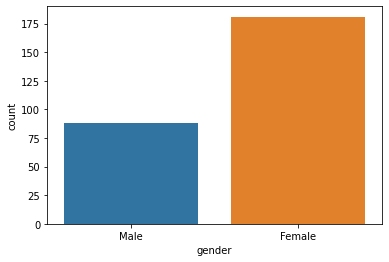

Female    181
Male       88
Name: gender, dtype: int64


In [7]:
#plot each class frequency
sns.countplot(x='gender',data=data)
plt.show()
print(data['gender'].value_counts())

From graph we can see there is female customer is more than the male customer who made online shopping.

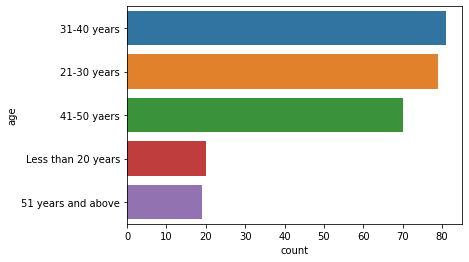

31-40 years           81
21-30 years           79
41-50 yaers           70
Less than 20 years    20
51 years and above    19
Name: age, dtype: int64


In [8]:
#plot each class frequency
sns.countplot(y='age',data=data)
plt.show()
print(data['age'].value_counts())

As we see there are most customer are from 31 to 40 years group, 21 to 30 years & 41 to 50 years old group.

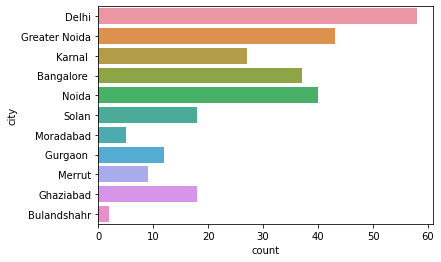

In [9]:
#plot each class frequency
sns.countplot(y='city',data=data)
plt.show()

From graph it is clear that the most online customers are from delhi & least customers from BUlandshahr.

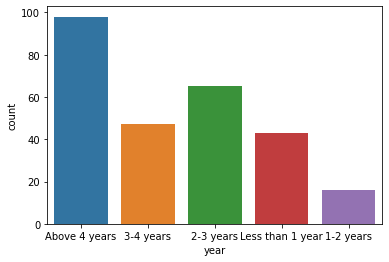

Above 4 years       98
2-3 years           65
3-4 years           47
Less than 1 year    43
1-2 years           16
Name: year, dtype: int64


In [10]:
#plot each class frequency
sns.countplot(x='year',data=data)
plt.show()
print(data['year'].value_counts())

AS we can see most of people are shopping since above 4 years.

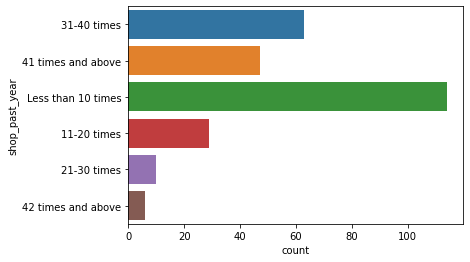

Less than 10 times    114
31-40 times            63
41 times and above     47
11-20 times            29
21-30 times            10
42 times and above      6
Name: shop_past_year, dtype: int64


In [11]:
#plot each class frequency
sns.countplot(y='shop_past_year',data=data)
plt.show()
print(data['shop_past_year'].value_counts())

from graph we can see less than 10 times customer has made an online purchase in the past 1 year

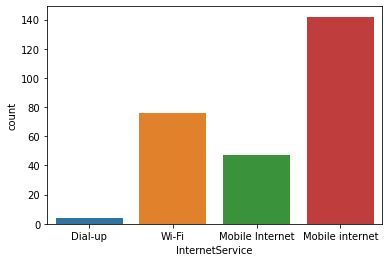

Mobile internet    142
Wi-Fi               76
Mobile Internet     47
Dial-up              4
Name: InternetService, dtype: int64


In [12]:
#plot each class frequency
sns.countplot(x='InternetService',data=data)
plt.show()
print(data['InternetService'].value_counts())

Most of the peoples are used mobile internet for the online shopping.

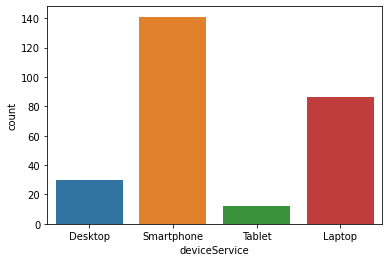

Smartphone    141
Laptop         86
Desktop        30
Tablet         12
Name: deviceService, dtype: int64


In [13]:
#plot each class frequency
sns.countplot(x='deviceService',data=data)
plt.show()
print(data['deviceService'].value_counts())

Most of the customers are using smartphones for the online shopping & least Tablet

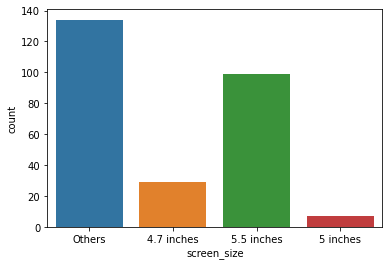

Others        134
5.5 inches     99
4.7 inches     29
5 inches        7
Name: screen_size, dtype: int64


In [14]:
#plot each class frequency
sns.countplot(x='screen_size',data=data)
plt.show()
print(data['screen_size'].value_counts())

The screen size is not same & diffrant

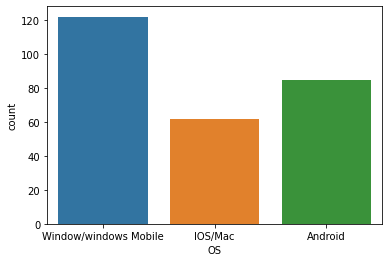

Window/windows Mobile    122
Android                   85
IOS/Mac                   62
Name: OS, dtype: int64


In [15]:
#plot each class frequency
sns.countplot(x='OS',data=data)
plt.show()
print(data['OS'].value_counts())

AS we seen custumers those who make online shopping have Window/windows Mobile operating system (OS) of device.

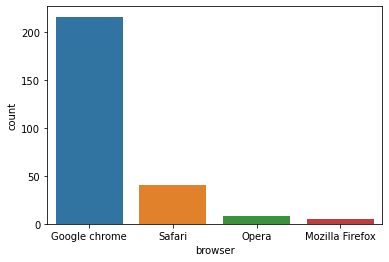

Google chrome      216
Safari              40
Opera                8
Mozilla Firefox      5
Name: browser, dtype: int64


In [16]:
#plot each class frequency
sns.countplot(x='browser',data=data)
plt.show()
print(data['browser'].value_counts())

As we seen most of the people use Google chrome as browser for the online shopping.

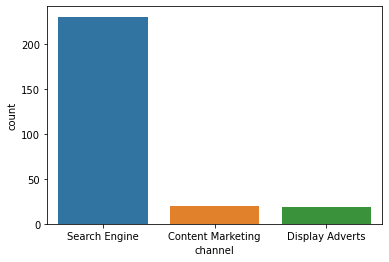

Search Engine        230
Content Marketing     20
Display Adverts       19
Name: channel, dtype: int64


In [17]:
#plot each class frequency
sns.countplot(x='channel',data=data)
plt.show()
print(data['channel'].value_counts())

Most of people use search engine after 1 vist to shopping site

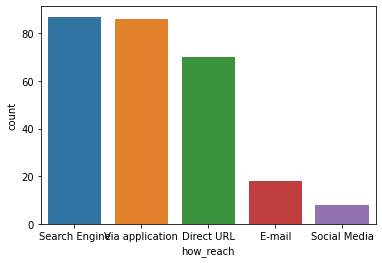

Search Engine      87
Via application    86
Direct URL         70
E-mail             18
Social Media        8
Name: how_reach, dtype: int64


In [18]:
#plot each class frequency
sns.countplot(x='how_reach',data=data)
plt.show()
print(data['how_reach'].value_counts())

most of peoples are use to reach the website through the search engin and application than the social media.

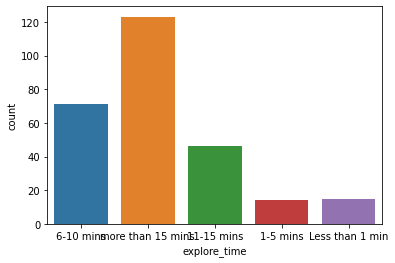

more than 15 mins    123
6-10 mins             71
11-15 mins            46
Less than 1 min       15
1-5 mins              14
Name: explore_time, dtype: int64


In [19]:
#plot each class frequency
sns.countplot(x='explore_time',data=data)
plt.show()
print(data['explore_time'].value_counts())

Peoples more than 15 mins are search or spend the time on website or app.

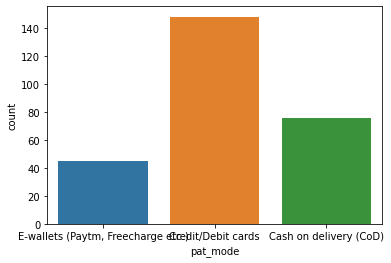

Credit/Debit cards                    148
Cash on delivery (CoD)                 76
E-wallets (Paytm, Freecharge etc.)     45
Name: pat_mode, dtype: int64


In [20]:
#plot each class frequency
sns.countplot(x='pat_mode',data=data)
plt.show()
print(data['pat_mode'].value_counts())

From graph we can see that most of the peoples are making payment from credit card or debit cards.

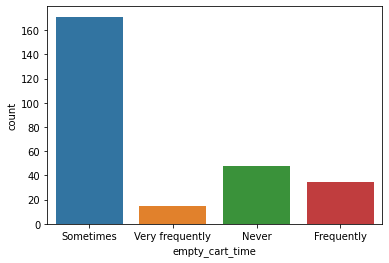

Sometimes          171
Never               48
Frequently          35
Very frequently     15
Name: empty_cart_time, dtype: int64


In [21]:
#plot each class frequency
sns.countplot(x='empty_cart_time',data=data)
plt.show()
print(data['empty_cart_time'].value_counts())

WE can see almost 171 peoples are empty there cart after adding the products in cart

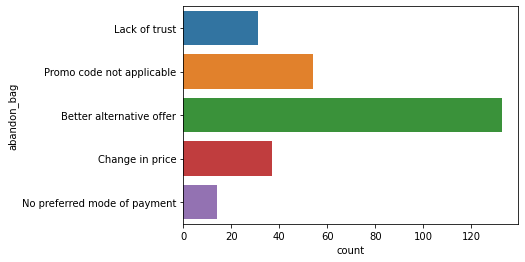

Better alternative offer        133
Promo code not applicable        54
Change in price                  37
Lack of trust                    31
No preferred mode of payment     14
Name: abandon_bag, dtype: int64


In [22]:
#plot each class frequency
sns.countplot(y='abandon_bag',data=data)
plt.show()
print(data['abandon_bag'].value_counts())

Almost 133 times the customers get better alternative offer and thats why they abandon the “Bag”/ “Shopping Cart.

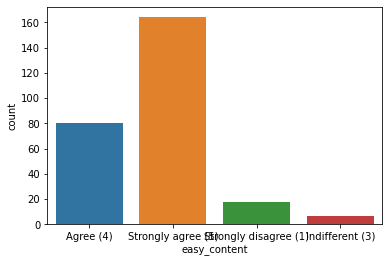

Strongly agree (5)       164
Agree (4)                 80
Strongly disagree (1)     18
Indifferent (3)            7
Name: easy_content, dtype: int64


In [23]:
#plot each class frequency
sns.countplot(x='easy_content',data=data)
plt.show()
print(data['easy_content'].value_counts())

there are around 164 people that strongly agree there should be easy content on the website to read and understand.

From 1 to 17 all question are plotted now lets move further 

In [24]:
# As we have columns from 18 to 46 are same answers type so lets separate and plot it.
df=data[['pro_comp', 'comp_info', 'cleary_info', 'easy_navi', 'speed',
       'user_fri', 'conv_pay', 'trust', 'empathy', 'privacy', 'communication',
       'benefit', 'enjoyment', 'conv_flexi', 'return_policy', 'loyalty',
       'quality_info', 'satisfaction', 'Net_Benefit', 'sat_withoutTrust',
       'off_variety', 'pro_comp_info', 'savings', 'patronizing', 'sense_advan',
       'enhances_social', 'gratification', 'fulfill_certain_roles',
       'value_money']]
df

pro_comp           comp_info         cleary_info  \
0       Indifferent (3)     Indifferent (3)           Agree (4)   
1    Strongly agree (5)  Strongly agree (5)  Strongly agree (5)   
2             Agree (4)           Agree (4)           Agree (4)   
3             Agree (4)     Indifferent (3)           Agree (4)   
4       Indifferent (3)     Indifferent (3)           Agree (4)   
..                  ...                 ...                 ...   
264           Agree (4)           Agree (4)           Agree (4)   
265  Strongly agree (5)  Strongly agree (5)  Strongly agree (5)   
266  Strongly agree (5)           Agree (4)           Agree (4)   
267           Agree (4)  Strongly agree (5)           Agree (4)   
268  Strongly agree (5)  Strongly agree (5)  Strongly agree (5)   

              easy_navi                  speed            user_fri  \
0             Agree (4)  Strongly disagree (1)       Dis-agree (2)   
1    Strongly agree (5)     Strongly agree (5)  Strongly agree (5)   
2             Agree (4)              Agree (4)  Strongly agree (5)   
3    Strongly agree (5)              Agree (4)  Strongly agree (5)   
4             Agree (4)     Strongly agree (5)  Strongly agree (5)   
..                  ...                    ...                 ...   
264           Agree (4)              Agree (4)           Agree (4)   
265  Strongly agree (5)     Strongly agree (5)  Strongly agree (5)   
266  Strongly agree (5)              Agree (4)           Agree (4)   
267           Agree (4)              Agree (4)  Strongly agree (5)   
268  Strongly agree (5)     Strongly agree (5)  Strongly agree (5)   

               conv_pay               trust             empathy  \
0         Dis-agree (2)        Disagree (2)  Strongly agree (5)   
1    Strongly agree (5)  Strongly agree (5)  Strongly agree (5)   
2    Strongly agree (5)  Strongly agree (5)  Strongly agree (5)   
3    Strongly agree (5)           Agree (4)  Strongly agree (5)   
4    Strongly agree (5)           Agree (4)  Strongly agree (5)   
..                  ...                 ...                 ...   
264           Agree (4)           Agree (4)           Agree (4)   
265  Strongly agree (5)  Strongly agree (5)  Strongly agree (5)   
266  Strongly agree (5)           Agree (4)     indifferent (3)   
267  Strongly agree (5)  Strongly agree (5)  Strongly agree (5)   
268  Strongly agree (5)  Strongly agree (5)  Strongly agree (5)   

                privacy  ...    sat_withoutTrust         off_variety  \
0             Agree (4)  ...  Strongly agree (5)     indifferent (3)   
1    Strongly agree (5)  ...  Strongly agree (5)  Strongly agree (5)   
2    Strongly agree (5)  ...           Agree (4)  Strongly agree (5)   
3    Strongly agree (5)  ...           Agree (4)           Agree (4)   
4             Agree (4)  ...  Strongly agree (5)           Agree (4)   
..                  ...  ...                 ...                 ...   
264           Agree (4)  ...           Agree (4)           Agree (4)   
265  Strongly agree (5)  ...  Strongly agree (5)  Strongly agree (5)   
266     indifferent (3)  ...           Agree (4)     indifferent (3)   
267  Strongly agree (5)  ...  Strongly agree (5)  Strongly agree (5)   
268  Strongly agree (5)  ...  Strongly agree (5)  Strongly agree (5)   

          pro_comp_info             savings         patronizing  \
0       indifferent (3)        Disagree (2)     indifferent (3)   
1    Strongly agree (5)  Strongly agree (5)     indifferent (3)   
2    Strongly agree (5)  Strongly agree (5)           Agree (4)   
3             Agree (4)  Strongly agree (5)           Agree (4)   
4             Agree (4)  Strongly agree (5)           Agree (4)   
..                  ...                 ...                 ...   
264     indifferent (3)        Disagree (2)     indifferent (3)   
265  Strongly agree (5)  Strongly agree (5)  Strongly agree (5)   
266  Strongly agree (5)           Agree (4)           Agree (4)   
267           Agree (4)      

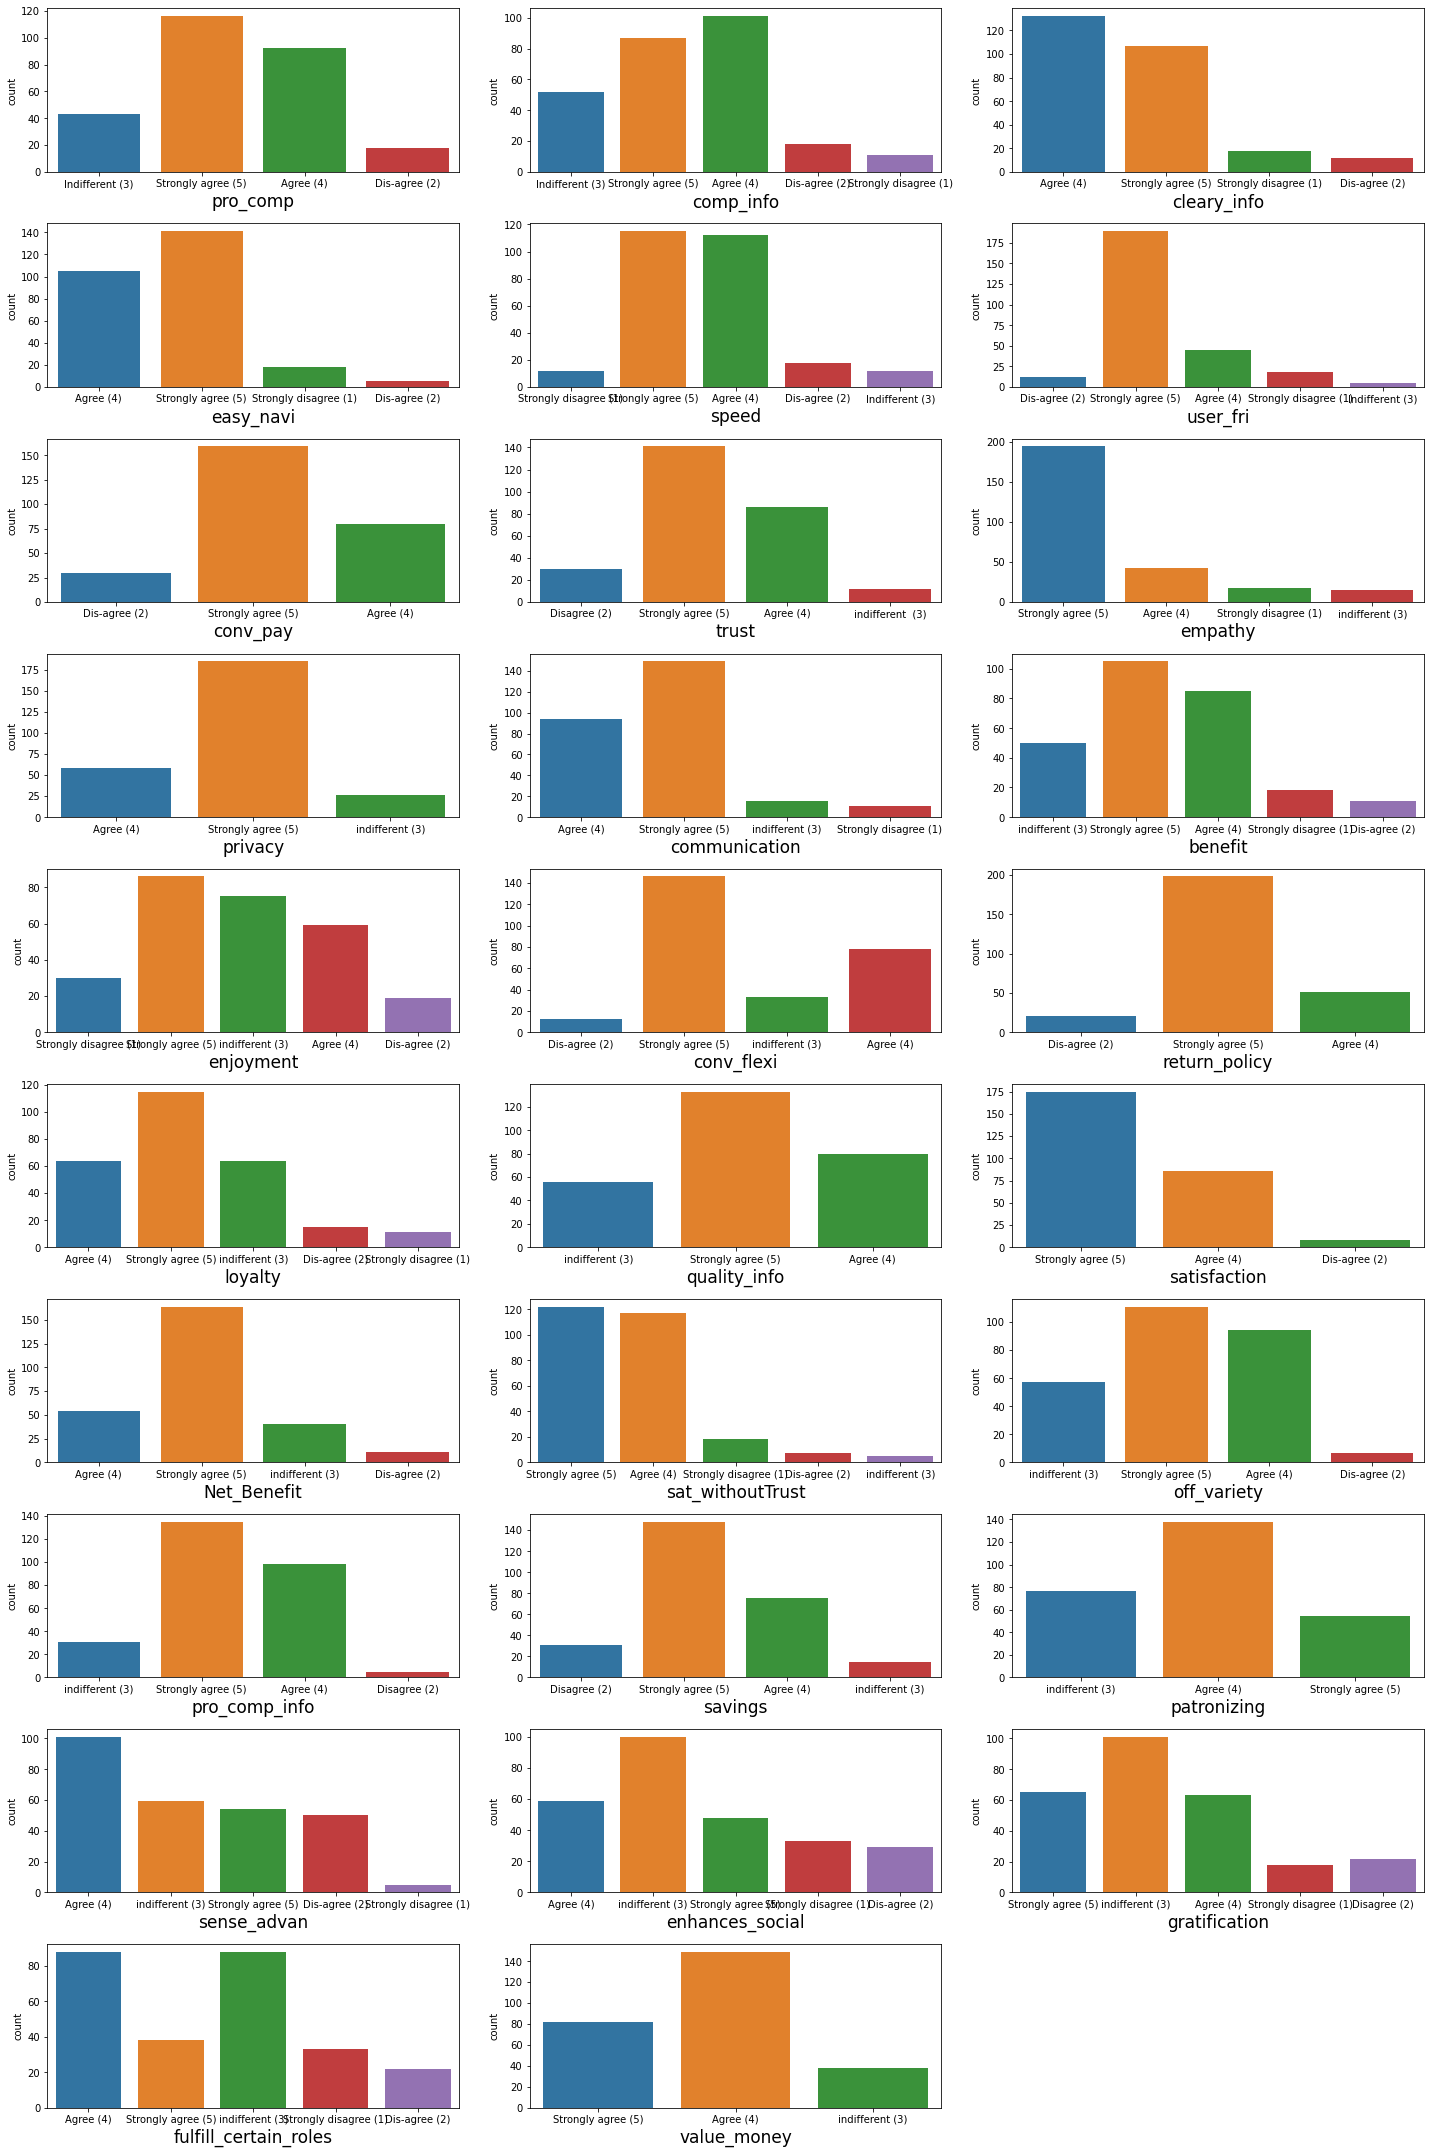

In [25]:
plt.figure(figsize=(20,30))
plotnumber=1
for column in df:
    if plotnumber<=30:
        ax=plt.subplot(10,3,plotnumber)
        sns.countplot(df[column])
        plt.xlabel(column,fontsize=17)
    plotnumber+=1
plt.tight_layout()

There are 132 customers are given 4 star and agreed that all relevant information on listed products must be stated clearly.

There are strongly agreed (5) 115 customers/people who thinks that the Loading and processing speed has to be there.

From graph we can see that there are strongly agreed 189 peoples who thinks the website should be User friendly Interface.

From graph we can see that most of people are indifferent (3) & Agree (4) for the Shopping on the website helps you fulfill certain roles 

As we dont have any output columns or any target variable we cant plot bivariant with target but lets check with other columns

<Figure size 720x432 with 0 Axes>

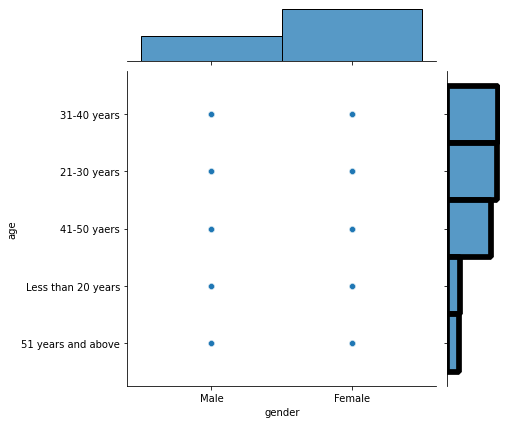

In [26]:
#Bivariant graph
plt.figure(figsize =(10, 6))
sns.jointplot(x ='gender', y ='age', data = data,kind = "scatter")
plt.show()

<Figure size 720x432 with 0 Axes>

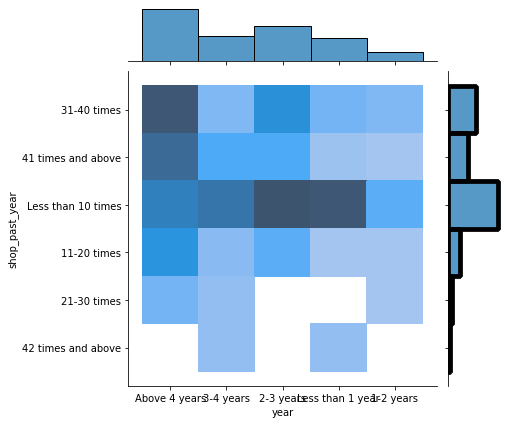

In [27]:
#Bivariant graph
plt.figure(figsize =(10, 6))
sns.jointplot(x ='year', y ='shop_past_year', data = data,kind = "hist")
plt.show()

from graph we can see less than 10 times customer has made an online purchase in the past 1 year in 2-3 years scine they doing Shopping Online 

<Figure size 720x432 with 0 Axes>

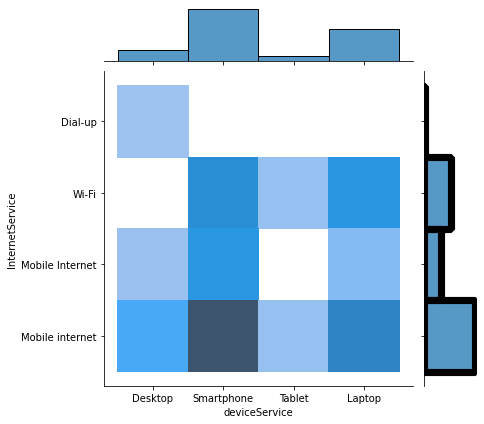

In [28]:
#Bivariant graph
plt.figure(figsize =(10, 6))
sns.jointplot(x ='deviceService', y ='InternetService', data = data,kind = "hist")
plt.show()

From graph we can see most of the peoples are used mobile internet on smartphone for online shopping

<Figure size 720x432 with 0 Axes>

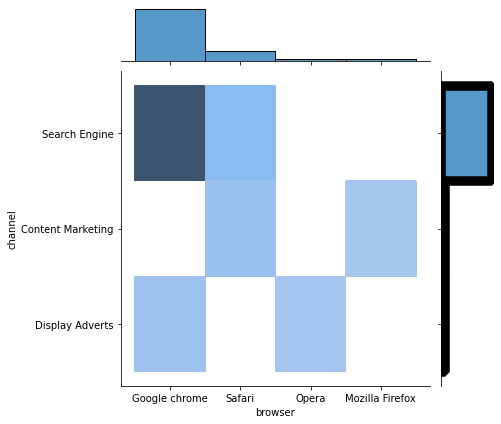

In [29]:
#Bivariant graph
plt.figure(figsize =(10, 6))
sns.jointplot(x ='browser', y ='channel', data = data,kind = "hist")
plt.show()

Maximum customers are using google chrome & search engine for online shopping.

In [30]:
# As we have all categorical columns from 1 to 3 and 5 to 17 lets first convert them into numeriacl form by using encoding tech.

In [31]:
# lets seaprate the catogorical data & numirical data
numerics=['int8','int16','int32','int64','float16','float32','float64']
cat_col=[] #empty list
features=data.columns[:47].values.tolist()
for i in features:
    if data[i].dtype in numerics:
        continue
    cat_col.append(i)
cat_col

['gender',
 'age',
 'city',
 'year',
 'shop_past_year',
 'InternetService',
 'deviceService',
 'screen_size',
 'OS',
 'browser',
 'channel',
 'how_reach',
 'explore_time',
 'pat_mode',
 'empty_cart_time',
 'abandon_bag',
 'easy_content',
 'pro_comp',
 'comp_info',
 'cleary_info',
 'easy_navi',
 'speed',
 'user_fri',
 'conv_pay',
 'trust',
 'empathy',
 'privacy',
 'communication',
 'benefit',
 'enjoyment',
 'conv_flexi',
 'return_policy',
 'loyalty',
 'quality_info',
 'satisfaction',
 'Net_Benefit',
 'sat_withoutTrust',
 'off_variety',
 'pro_comp_info',
 'savings',
 'patronizing',
 'sense_advan',
 'enhances_social',
 'gratification',
 'fulfill_certain_roles',
 'value_money']

In [32]:
# Lets frist covert categorical data(type & column) into int 
label = LabelEncoder()
for i in cat_col:
    df=label.fit_transform(data[i])
    pd.Series(df)
    data[i]=df

In [33]:
data.head()

gender  age  city     pin  year  shop_past_year  InternetService  \
0       1    1     2  110009     3               2                0   
1       0    0     2  110030     3               3                3   
2       0    0     4  201308     2               3                1   
3       1    0     6  132001     2               5                1   
4       0    0     0  530068     1               0                3   

   deviceService  screen_size  OS  ...        Longer_time_logIn  \
0              0            3   2  ...                Amazon.in   
1              2            0   1  ...  Amazon.in, Flipkart.com   
2              2            2   0  ...               Myntra.com   
3              2            2   1  ...             Snapdeal.com   
4              2            0   1  ...  Flipkart.com, Paytm.com   

          Longer_time_photo  Late_declaration  loading_time  limited_pay_mode  \
0                 Amazon.in      Flipkart.com  Flipkart.com         Amazon.in   
1                Myntra.com      snapdeal.com  Snapdeal.com      Snapdeal.com   
2                Myntra.com        Myntra.com    Myntra.com         Amazon.in   
3  Myntra.com, Snapdeal.com        Myntra.com     Paytm.com         Paytm.com   
4                 Paytm.com         Paytm.com     Paytm.com      Snapdeal.com   

   Longer_delivery               app_design      Frequent_disruption  \
0        Paytm.com             Flipkart.com                Amazon.in   
1     Snapdeal.com                Amazon.in               Myntra.com   
2        Paytm.com                Paytm.com                Paytm.com   
3        Paytm.com  Amazon.in, Flipkart.com  Amazon.in, Flipkart.com   
4        Paytm.com                Amazon.in             Snapdeal.com   

                        efficient_web                    recommendation  
0                           Amazon.in                      Flipkart.com  
1             Amazon.in, Flipkart.com             Amazon.in, Myntra.com  
2                           Amazon.in  Amazon.in, Paytm.com, Myntra.com  
3  Amazon.in, Flipkart.com, Paytm.com           Amazon.in, Flipkart.com  
4                           Paytm.com             Amazon.in, Myntra.com  

[5 rows x 71 columns]

NOw till the coumns 47 we have encoded the data in to numirical now lets move further

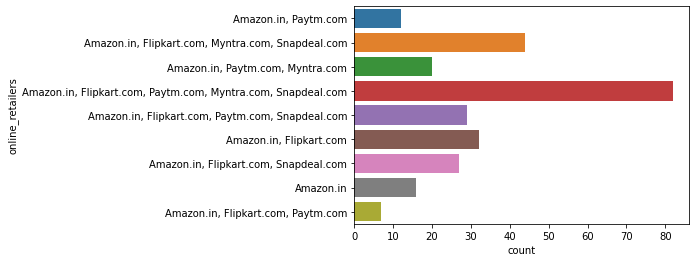

Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    82
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               44
Amazon.in, Flipkart.com                                         32
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                29
Amazon.in, Flipkart.com, Snapdeal.com                           27
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in                                                       16
Amazon.in, Paytm.com                                            12
Amazon.in, Flipkart.com, Paytm.com                               7
Name: online_retailers, dtype: int64


In [34]:
#plot each class frequency
sns.countplot(y='online_retailers',data=data)
plt.show()
print(data['online_retailers'].value_counts())

AS we see there are all online retailers at count of 82.

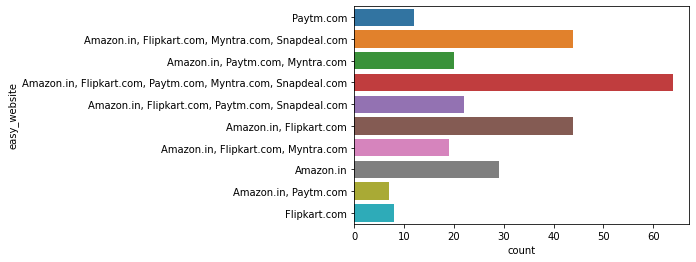

Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    64
Amazon.in, Flipkart.com                                         44
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               44
Amazon.in                                                       29
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                22
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in, Flipkart.com, Myntra.com                             19
Paytm.com                                                       12
Flipkart.com                                                     8
Amazon.in, Paytm.com                                             7
Name: easy_website, dtype: int64


In [35]:
#plot each class frequency
sns.countplot(y='easy_website',data=data)
plt.show()
print(data['easy_website'].value_counts())

64 customers are think that Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com are the easy websites.

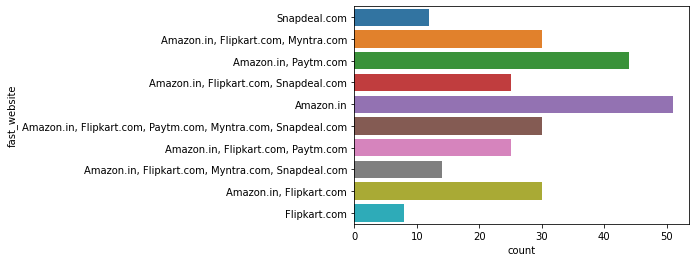

Amazon.in                                                       51
Amazon.in, Paytm.com                                            44
Amazon.in, Flipkart.com                                         30
Amazon.in, Flipkart.com, Myntra.com                             30
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    30
Amazon.in, Flipkart.com, Paytm.com                              25
Amazon.in, Flipkart.com, Snapdeal.com                           25
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Snapdeal.com                                                    12
Flipkart.com                                                     8
Name: fast_website, dtype: int64


In [36]:
#plot each class frequency
sns.countplot(y='fast_website',data=data)
plt.show()
print(data['fast_website'].value_counts())

At count of 51 customers are think that the Amazon is the Fast loading website speed of website and application than the others.

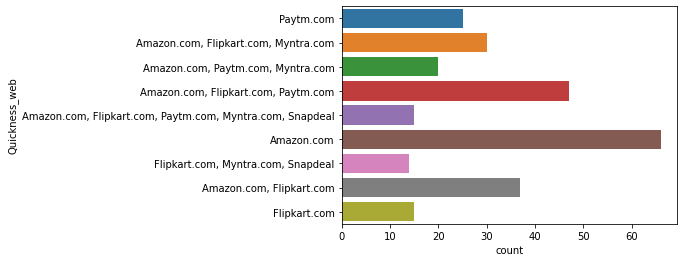

Amazon.com                                                   66
Amazon.com, Flipkart.com, Paytm.com                          47
Amazon.com, Flipkart.com                                     37
Amazon.com, Flipkart.com, Myntra.com                         30
Paytm.com                                                    25
Amazon.com, Paytm.com, Myntra.com                            20
Amazon.com, Flipkart.com, Paytm.com, Myntra.com, Snapdeal    15
Flipkart.com                                                 15
Flipkart.com, Myntra.com, Snapdeal                           14
Name: Quickness_web, dtype: int64


In [37]:
#plot each class frequency
sns.countplot(y='Quickness_web',data=data)
plt.show()
print(data['Quickness_web'].value_counts())

As we seen as compaire to other sites the Amazon.com is the best site in Quickness to complete purchase.

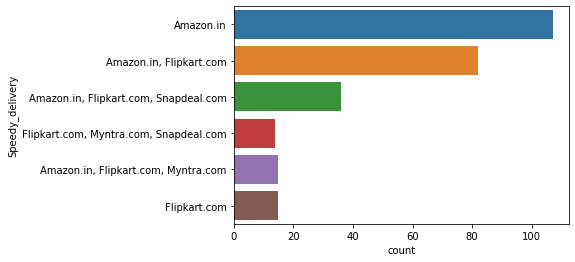

Amazon.in                                 107
Amazon.in, Flipkart.com                    82
Amazon.in, Flipkart.com, Snapdeal.com      36
Amazon.in, Flipkart.com, Myntra.com        15
Flipkart.com                               15
Flipkart.com, Myntra.com, Snapdeal.com     14
Name: Speedy_delivery, dtype: int64


In [38]:
#plot each class frequency
sns.countplot(y='Speedy_delivery',data=data)
plt.show()
print(data['Speedy_delivery'].value_counts())

WE see that the Amazon.in is the best in spedeely delivering the products than the others.

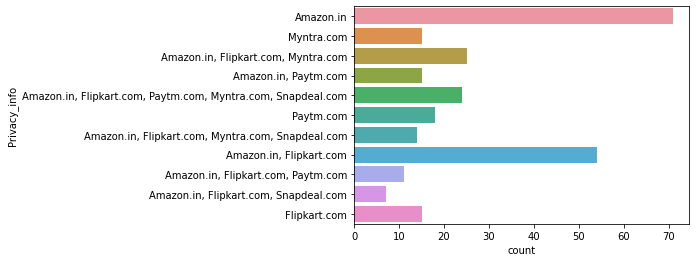

Amazon.in                                                       71
Amazon.in, Flipkart.com                                         54
Amazon.in, Flipkart.com, Myntra.com                             25
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    24
Paytm.com                                                       18
Amazon.in, Paytm.com                                            15
Myntra.com                                                      15
Flipkart.com                                                    15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Amazon.in, Flipkart.com, Paytm.com                              11
Amazon.in, Flipkart.com, Snapdeal.com                            7
Name: Privacy_info, dtype: int64


In [39]:
#plot each class frequency
sns.countplot(y='Privacy_info',data=data)
plt.show()
print(data['Privacy_info'].value_counts())

From graph we can see the amazon.in is the best than the others who keeps Privacy of customers information.

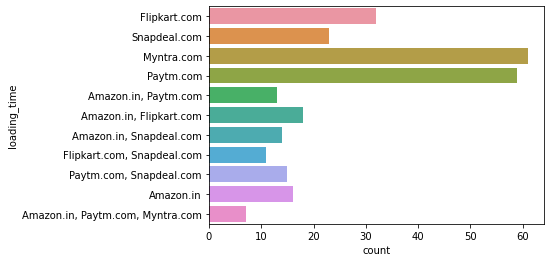

Myntra.com                          61
Paytm.com                           59
Flipkart.com                        32
Snapdeal.com                        23
Amazon.in, Flipkart.com             18
Amazon.in                           16
Paytm.com, Snapdeal.com             15
Amazon.in, Snapdeal.com             14
Amazon.in, Paytm.com                13
Flipkart.com, Snapdeal.com          11
Amazon.in, Paytm.com, Myntra.com     7
Name: loading_time, dtype: int64


In [40]:
#plot each class frequency
sns.countplot(y='loading_time',data=data)
plt.show()
print(data['loading_time'].value_counts())

AS compaire to others Myntra.com has Longer page loading time (promotion, sales period).

NOw lets move further for columns 48 to 71 they have multiple inputs in single row also have duplicate input also so lest frist check and remove them & separate them .

In [41]:
# lets seaprate again for 48to 71 the catogorical data & numirical data
numerics=['int8','int16','int32','int64','float16','float32','float64']
cat_col1=[] #empty list
features=data.columns.values.tolist()
for i in features:
    if data[i].dtype in numerics:
        continue
    cat_col1.append(i)
cat_col1

['online_retailers',
 'easy_website',
 'Visual_web-page',
 'Wild_variety_offer',
 'relevant_info',
 'fast_website',
 'Reliability_web',
 'Quickness_web',
 'several_ payment',
 'Speedy_delivery',
 'Privacy_info',
 'Secu_finan_info',
 'Trustworthiness',
 'online_assist',
 'Longer_time_logIn',
 'Longer_time_photo',
 'Late_declaration',
 'loading_time',
 'limited_pay_mode',
 'Longer_delivery',
 'app_design',
 'Frequent_disruption',
 'efficient_web',
 'recommendation']

In [42]:
# Check for the unique values in the columns(48 to 71)
unique_list = [] # initialize a null list   
for x in range(47,71):# traverse for all elements
    unique = [[k.lower() for k in i.split(',')]for i in data.iloc[:,x]]
    for value in unique:
        for v in value:
            if v not in unique_list: # check if exists in unique_list or not
                unique_list.append(v)
unique_list 

['amazon.in',
 ' paytm.com',
 ' flipkart.com',
 ' myntra.com',
 ' snapdeal.com',
 'paytm.com',
 'flipkart.com',
 'myntra.com',
 'snapdeal.com',
 'amazon.com',
 ' snapdeal',
 'patym.com',
 ' patym.com']

As we see there must be 5 unique values but we have duplicates because of spelling mistekes lets remove them frist and then see the distribution as well as encoding them.

In [43]:
# Removing duplicates & correcting spelling mistekes
for i in cat_col1:
    data[i] = data[i].str.lower()
    data[i]= data[i].str.replace('amazon.in','amazon.com')
    data[i]= data[i].str.replace('patym.com','paytm.com')
    data[i]= data[i].str.replace(' patym.com','paytm.com')
    data[i] = data[i].str.replace(' paytm.com','paytm.com')
    data[i] = data[i].str.replace(' flipkart.com','flipkart.com')
    data[i] = data[i].str.replace(' snapdeal','snapdeal')
    data[i] = data[i].str.replace(' snapdeal.com','snapdeal')
    data[i] = data[i].str.replace('snapdeal.com','snapdeal')
    data[i] = data[i].str.replace(' myntra.com','myntra.com')

In [44]:
# Lets Check again for the unique values in the columns(48 to 71) after treatment
unique_list = [] # initialize a null list   
for x in range(47,71):# traverse for all elements
    unique = [[k.lower() for k in i.split(',')]for i in data.iloc[:,x]]
    for value in unique:
        for v in value:
            if v not in unique_list: # check if exists in unique_list or not
                unique_list.append(v)
unique_list 

['amazon.com', 'paytm.com', 'flipkart.com', 'myntra.com', 'snapdeal']

In [45]:
# Lets separate multipal inputs and encoding them by using getdummies method
for col in cat_col1:
    df_new=data[col].str.get_dummies(sep=',').add_prefix(col+'_')
    data=pd.concat([data,df_new],axis=1)
    data.drop(col,axis = 1,inplace= True)

In [46]:
data.shape # Recheck the data row and columns number

(269, 166)

In [47]:
data.head(3)

gender  age  city     pin  year  shop_past_year  InternetService  \
0       1    1     2  110009     3               2                0   
1       0    0     2  110030     3               3                3   
2       0    0     4  201308     2               3                1   

   deviceService  screen_size  OS  ...  efficient_web_amazon.com  \
0              0            3   2  ...                         1   
1              2            0   1  ...                         1   
2              2            2   0  ...                         1   

   efficient_web_flipkart.com  efficient_web_myntra.com  \
0                           0                         0   
1                           1                         0   
2                           0                         0   

   efficient_web_paytm.com  efficient_web_snapdeal  recommendation_amazon.com  \
0                        0                       0                          0   
1                        0                       0                          1   
2                        0                       0                          1   

   recommendation_flipkart.com  recommendation_myntra.com  \
0                            1                          0   
1                            0                          1   
2                            0                          1   

   recommendation_paytm.com  recommendation_snapdeal  
0                         0                        0  
1                         0                        0  
2                         1                        0  

[3 rows x 166 columns]

In [48]:
# Now our data looks great to build model

In [49]:
#first remove duplicates & recheck the size
a=data.drop_duplicates(inplace=True)

print(data.shape)

(103, 166)


In [50]:
print(a)

None


In [51]:
# Lets understand data at high level check the stastics of dataset
data.describe(include='all')

gender         age        city            pin        year  \
count  103.000000  103.000000  103.000000     103.000000  103.000000   
mean     0.359223    1.262136    4.320388  232449.844660    2.368932   
std      0.482119    1.137258    3.193786  150755.596481    1.204487   
min      0.000000    0.000000    0.000000  110008.000000    0.000000   
25%      0.000000    0.000000    2.000000  132001.000000    1.000000   
50%      0.000000    1.000000    4.000000  201305.000000    3.000000   
75%      1.000000    2.000000    7.000000  202156.500000    3.000000   
max      1.000000    4.000000   10.000000  560037.000000    4.000000   

       shop_past_year  InternetService  deviceService  screen_size  \
count      103.000000       103.000000     103.000000   103.000000   
mean         3.116505         2.077670       1.495146     2.203883   
std          1.728090         0.588939       0.790554     1.003516   
min          0.000000         0.000000       0.000000     0.000000   
25%          2.000000         2.000000       1.000000     2.000000   
50%          3.000000         2.000000       2.000000     2.000000   
75%          5.000000         2.000000       2.000000     3.000000   
max          5.000000         3.000000       3.000000     3.000000   

               OS  ...  efficient_web_amazon.com  efficient_web_flipkart.com  \
count  103.000000  ...                103.000000                  103.000000   
mean     1.155340  ...                  0.660194                    0.417476   
std      0.848959  ...                  0.475959                    0.495554   
min      0.000000  ...                  0.000000                    0.000000   
25%      0.000000  ...                  0.000000                    0.000000   
50%      1.000000  ...                  1.000000                    0.000000   
75%      2.000000  ...                  1.000000                    1.000000   
max      2.000000  ...                  1.000000                    1.000000   

       efficient_web_myntra.com  efficient_web_paytm.com  \
count                103.000000               103.000000   
mean                   0.048544                 0.252427   
std                    0.215963                 0.436529   
min                    0.000000                 0.000000   
25%                    0.000000                 0.000000   
50%                    0.000000                 0.000000   
75%                    0.000000                 0.500000   
max                    1.000000                 1.000000   

       efficient_web_snapdeal  recommendation_amazon.com  \
count              103.000000                 103.000000   
mean                 0.097087                   0.805825   
std                  0.297525                   0.397498   
min                  0.000000                   0.000000   
25%                  0.000000                   1.000000   
50%                  0.000000                   1.000000   
75%                  0.000000                   1.000000   
max                  1.000000                   1.000000   

       recommendation_flipkart.com  recommendation_myntra.com  \
count                   103.000000                 103.000000   
mean                      0.456311                   0.310680   
std                       0.500523                   0.465035   
min                       0.000000                   0.000000   
25%                       0.000000                   0.000000   
50%                       0.000000                   0.000000   
75%                       1.000000                   1.000000   
max                       1.000000                   1.000000   

       recommendation_paytm.com  recommendation_snapdeal  
count                103.000000               103.000000  
mean                   0.184466                 0.048544  
std                    0.389760                 0.215963  
min                    0.000000                 0.000000  
25%                    0.000000                

In [52]:
# Lets remove uneccesary columns
data=data.drop(columns=['pin'])

In [53]:
data.shape

(103, 165)

In [54]:
# Lets check the skewness
data.skew()

gender                         0.595556
age                            0.689249
city                           0.300637
year                          -0.371648
shop_past_year                -0.334443
                                 ...   
recommendation_amazon.com     -1.569220
recommendation_flipkart.com    0.178032
recommendation_myntra.com      0.830343
recommendation_paytm.com       1.651179
recommendation_snapdeal        4.263657
Length: 165, dtype: float64

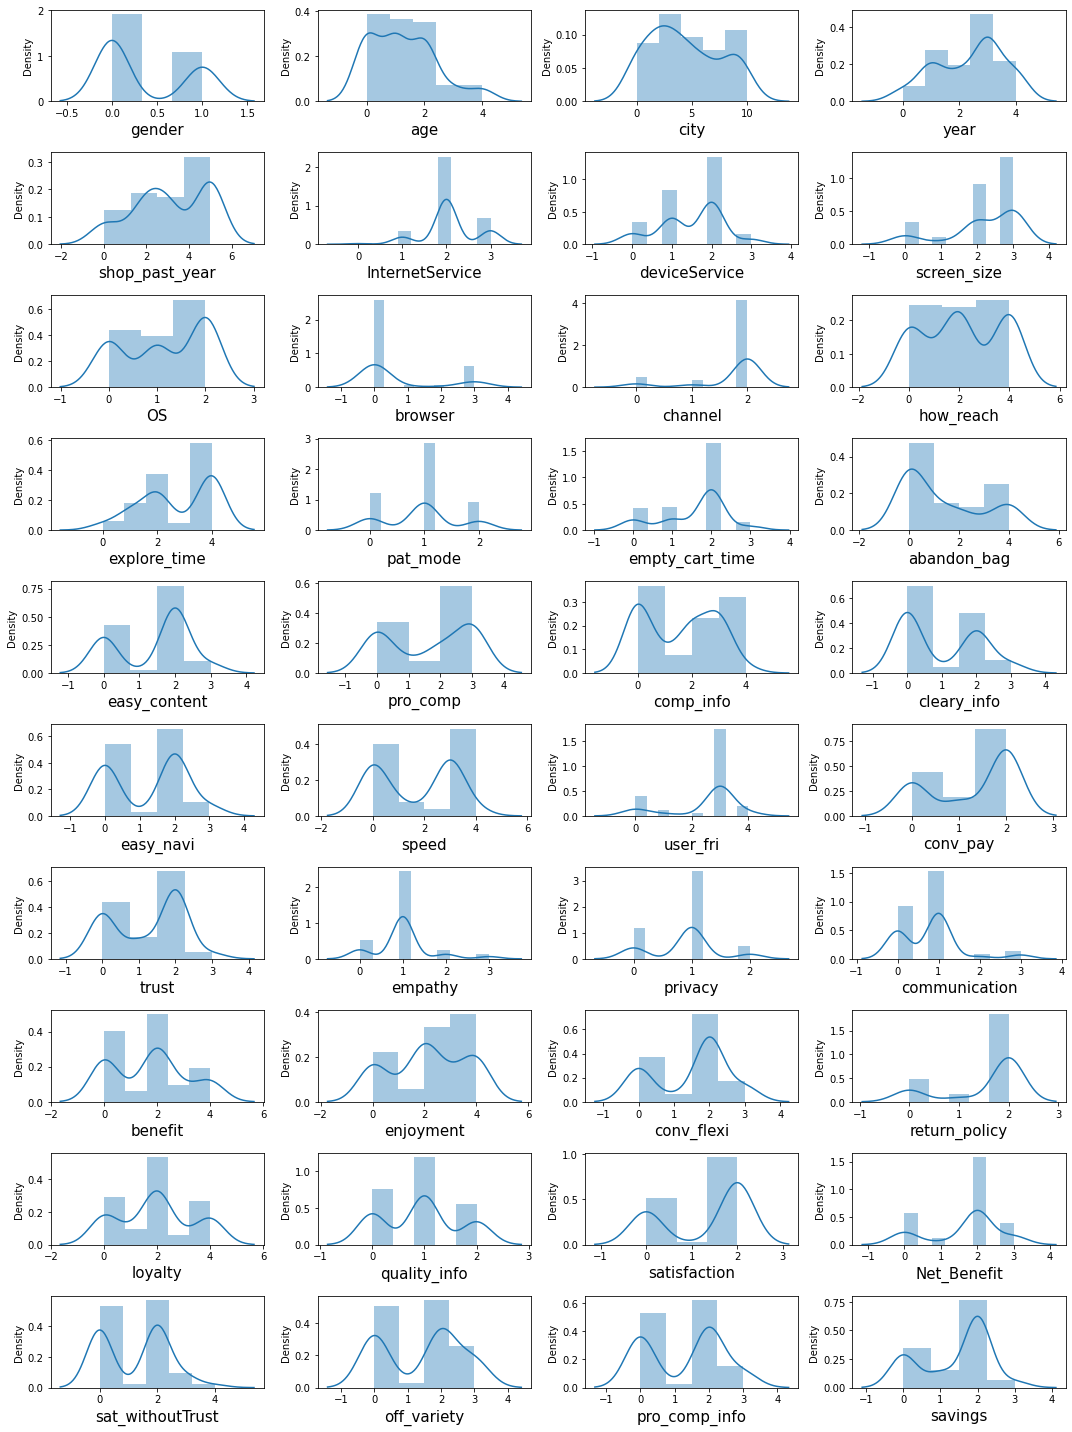

In [55]:
#Let's see the how data is distributed or Graphical analysis of all features
plt.figure(figsize=(15,20))
plotnumber=1
for column in data:
    if plotnumber<=40:
        ax=plt.subplot(10,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

AS we see there is skewness is present in the columns so lets use Power Transformation to remove skewness.

In [56]:
data.columns[ :46] # we are just selecting numerical columns not categorical (0,1)

Index(['gender', 'age', 'city', 'year', 'shop_past_year', 'InternetService',
       'deviceService', 'screen_size', 'OS', 'browser', 'channel', 'how_reach',
       'explore_time', 'pat_mode', 'empty_cart_time', 'abandon_bag',
       'easy_content', 'pro_comp', 'comp_info', 'cleary_info', 'easy_navi',
       'speed', 'user_fri', 'conv_pay', 'trust', 'empathy', 'privacy',
       'communication', 'benefit', 'enjoyment', 'conv_flexi', 'return_policy',
       'loyalty', 'quality_info', 'satisfaction', 'Net_Benefit',
       'sat_withoutTrust', 'off_variety', 'pro_comp_info', 'savings',
       'patronizing', 'sense_advan', 'enhances_social', 'gratification',
       'fulfill_certain_roles', 'value_money'],
      dtype='object')

In [57]:
from sklearn.preprocessing import PowerTransformer # for removing skewness

fetures=['gender', 'age', 'city', 'year', 'shop_past_year', 'InternetService',
       'deviceService', 'screen_size', 'OS', 'browser', 'channel', 'how_reach',
       'explore_time', 'pat_mode', 'empty_cart_time', 'abandon_bag',
       'easy_content', 'pro_comp', 'comp_info', 'cleary_info', 'easy_navi',
       'speed', 'user_fri', 'conv_pay', 'trust', 'empathy', 'privacy',
       'communication', 'benefit', 'enjoyment', 'conv_flexi', 'return_policy',
       'loyalty', 'quality_info', 'satisfaction', 'Net_Benefit',
       'sat_withoutTrust', 'off_variety', 'pro_comp_info', 'savings',
       'patronizing', 'sense_advan', 'enhances_social', 'gratification',
       'fulfill_certain_roles', 'value_money']
pt=PowerTransformer()
data[fetures]=pt.fit_transform(data[fetures].values)

In [58]:
data[fetures]

gender       age      city      year  shop_past_year  InternetService  \
0    1.335584 -0.017207 -0.618334  0.502944       -0.672946        -3.045377   
1   -0.748736 -1.294478 -0.618334  0.502944       -0.093052         1.652696   
2   -0.748736 -1.294478  0.065974 -0.361145       -0.093052        -1.763749   
3    1.335584 -1.294478  0.623623 -0.361145        1.109889        -1.763749   
4   -0.748736 -1.294478 -1.607619 -1.153807       -1.763391         1.652696   
..        ...       ...       ...       ...             ...              ...   
105 -0.748736  0.780975 -0.254801 -1.153807       -0.672946        -1.763749   
106 -0.748736 -0.017207 -0.254801 -1.848189       -0.672946        -1.763749   
107 -0.748736  1.843761 -0.254801  1.424355        1.109889         1.652696   
112  1.335584 -0.017207 -1.048650 -1.848189        1.109889        -1.763749   
116 -0.748736 -1.294478 -1.607619 -1.153807       -1.763391         1.652696   

     deviceService  screen_size        OS   browser  ...  sat_withoutTrust  \
0        -1.774901     0.915436  1.005363 -0.535917  ...          0.744329   
1         0.623963    -1.842144 -0.203035 -0.535917  ...          0.744329   
2         0.623963    -0.491084 -1.358826 -0.535917  ...         -1.123554   
3         0.623963    -0.491084 -0.203035  1.888767  ...         -1.123554   
4         0.623963    -1.842144 -0.203035  1.888767  ...          0.744329   
..             ...          ...       ...       ...  ...               ...   
105       0.623963    -0.491084 -1.358826 -0.535917  ...          0.744329   
106       0.623963     0.915436 -1.358826 -0.535917  ...          0.744329   
107       0.623963    -0.491084  1.005363 -0.535917  ...         -0.020034   
112       0.623963    -1.387864 -1.358826  1.649024  ...          1.854671   
116       0.623963    -1.842144 -0.203035  1.888767  ...          0.744329   

     off_variety  pro_comp_info   savings  patronizing  sense_advan  \
0       1.268316       1.401024 -0.543408     1.296552    -1.104811   
1       0.543693       0.670715  0.614864     1.296552     1.322941   
2       0.543693       0.670715  0.614864    -0.915299    -1.104811   
3      -1.222357      -1.187322  0.614864    -0.915299    -1.104811   
4      -1.222357      -1.187322  0.614864    -0.915299     1.322941   
..           ...            ...       ...          ...          ...   
105     0.543693       0.670715  0.614864     0.701899     0.617957   
106     0.543693       0.670715  0.614864     0.701899     0.617957   
107    -0.264747      -1.187322 -1.464996     0.701899     0.617957   
112    -1.222357      -0.163204 -1.464996     1.296552     1.021948   
116    -1.222357      -1.187322  0.614864    -0.915299     1.322941   

     enhances_social  gratification  fulfill_certain_roles  value_money  
0          -1.522418      -0.142475              -1.297137     0.929548  
1           1.039192      -0.142475               0.028374     0.929548  
2          -1.522418       1.081630               1.068213    -0.885376  
3          -0.296906      -1.461856               1.068213    -0.885376  
4           0.361071      -0.142475               0.569866     0.929548  
..               ...            ...                    ...          ...  
105        -0.296906      -0.142475               0.028374     0.929548  
106        -0.296906      -0.142475               0.028374     0.929548  
107        -0.296906      -0.142475               0.028374    -0.885376  
112         1.039192       1.081630               1.068213     1.480065  
116         0.361071      -0.142475               0.569866     0.929548  

[103 rows x 46 columns]

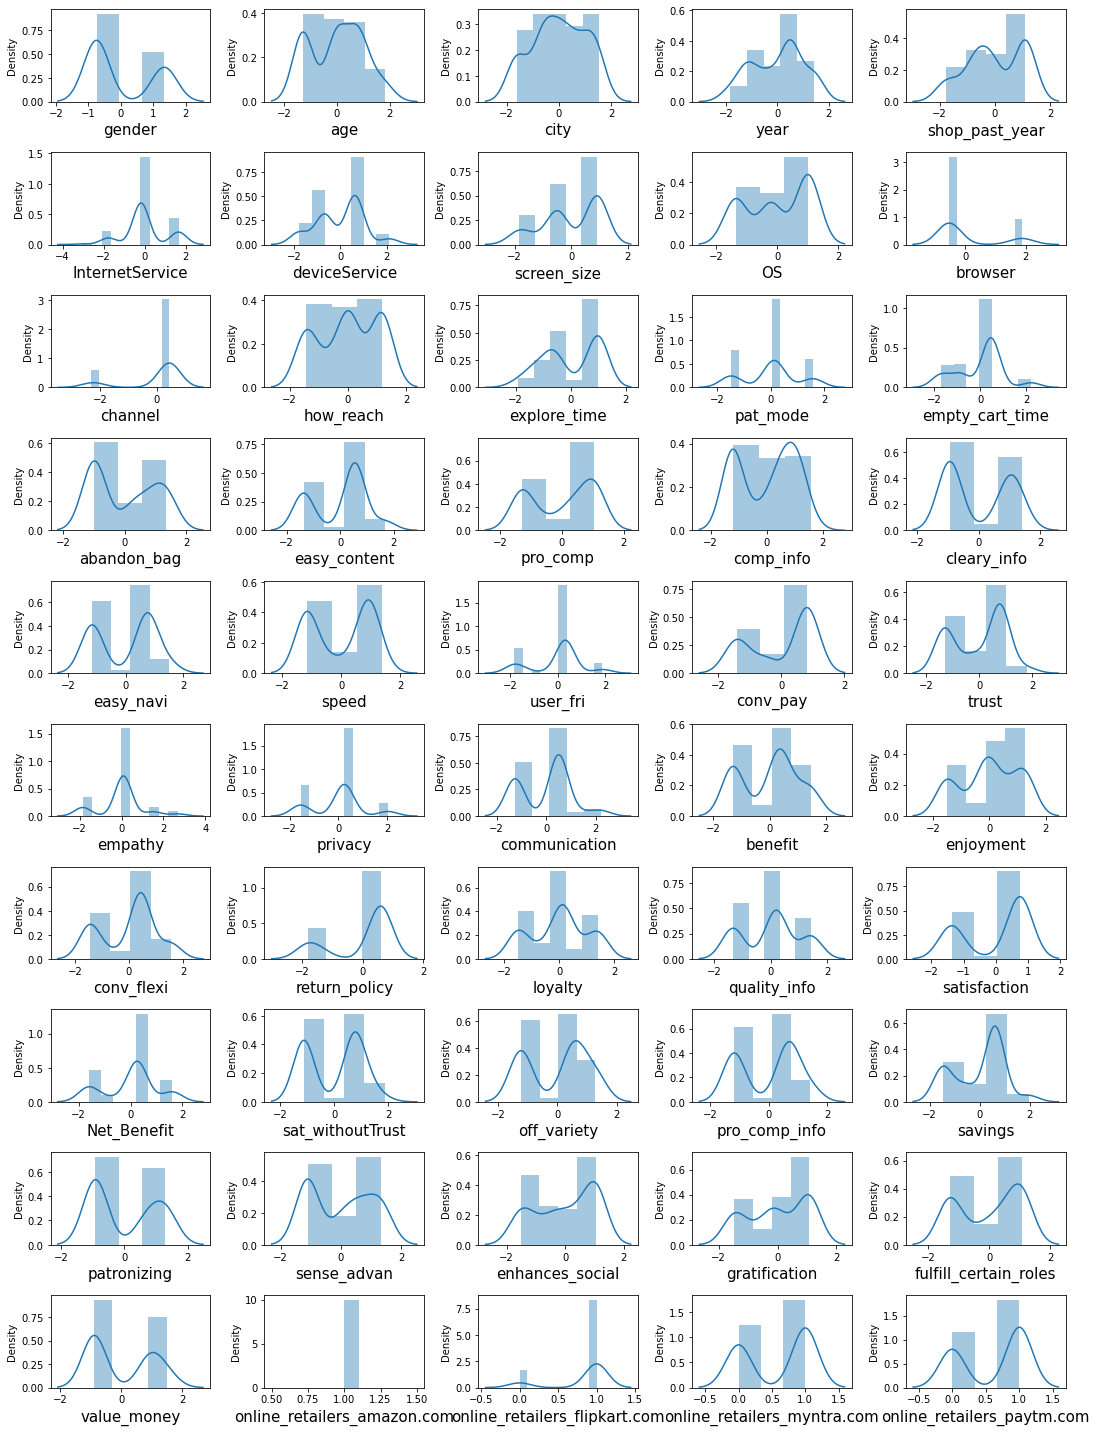

In [59]:
# distribusion after transformation
plt.figure(figsize=(15,20))
plotnumber=1
for column in data:
    if plotnumber<=50:
        ax=plt.subplot(10,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

NOw data looks good after removing the skewness. Lets move further and check for the outliers.

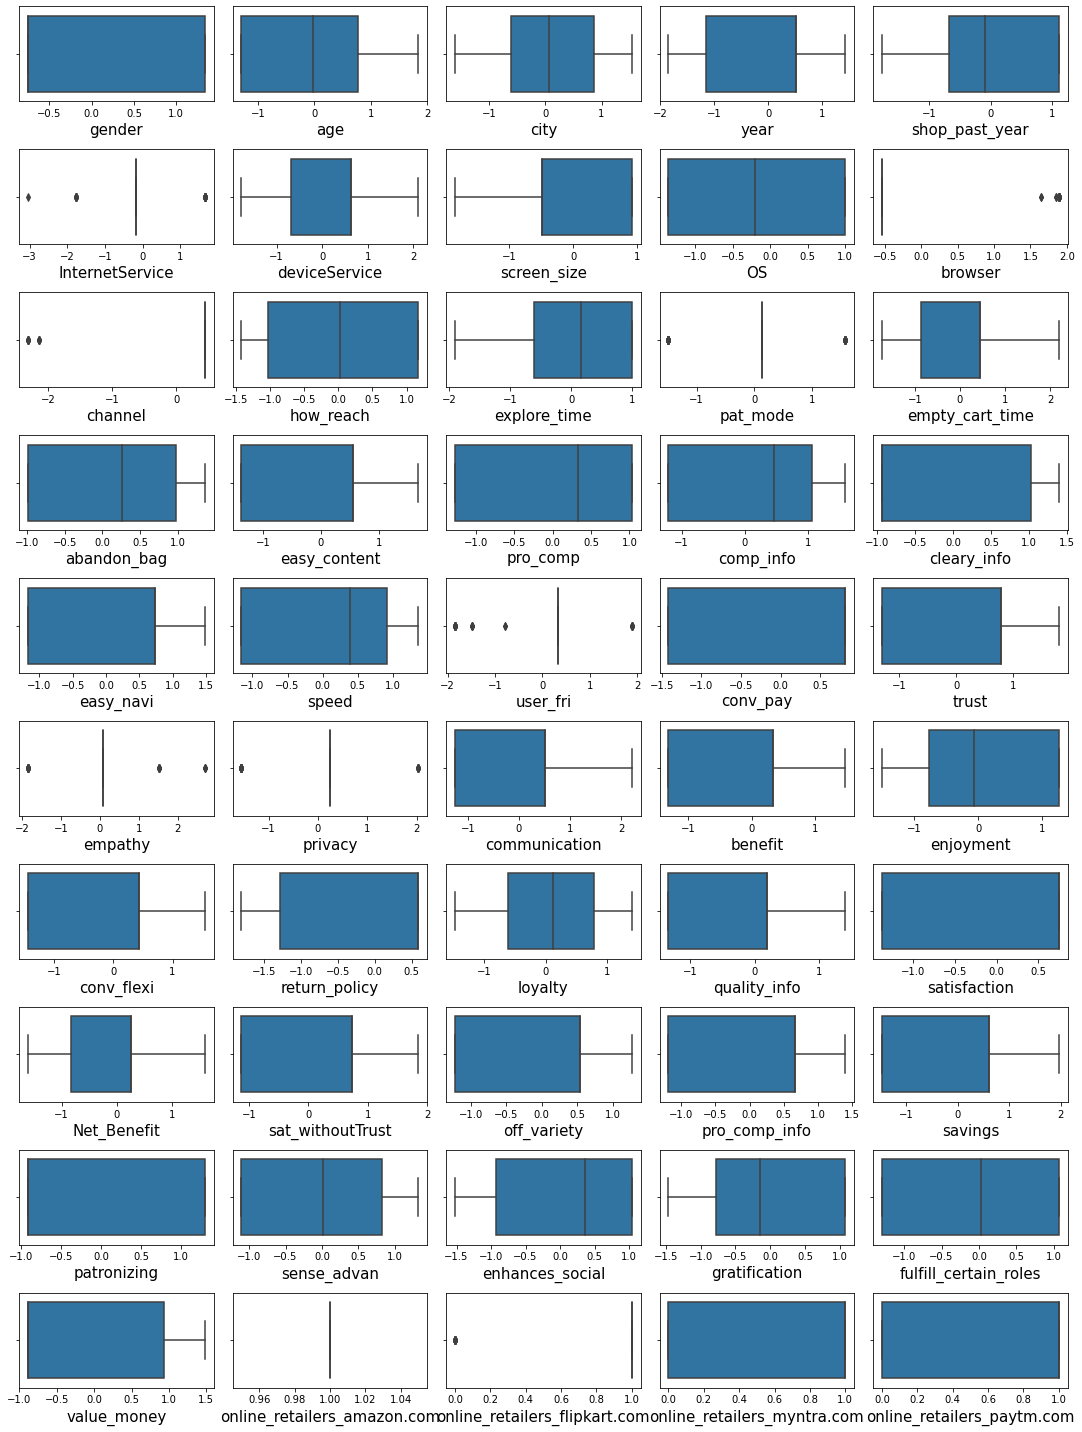

In [60]:
# distribusion for the outliers by plotting box plot
plt.figure(figsize=(15,20))
plotnumber=1
for column in data:
    if plotnumber<=50:
        ax=plt.subplot(10,5,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

In [61]:
# from above graph we see there is outliers in featurs Let's remove outliers from above columns
z_score=zscore(data[['InternetService','browser','channel','pat_mode','user_fri','empathy','privacy']])
abs_z_score=np.abs(z_score)
filtering_entry=(abs_z_score<3).all(axis=1)
data1=data[filtering_entry]

In [62]:
data1

gender       age      city      year  shop_past_year  InternetService  \
1   -0.748736 -1.294478 -0.618334  0.502944       -0.093052         1.652696   
2   -0.748736 -1.294478  0.065974 -0.361145       -0.093052        -1.763749   
3    1.335584 -1.294478  0.623623 -0.361145        1.109889        -1.763749   
4   -0.748736 -1.294478 -1.607619 -1.153807       -1.763391         1.652696   
5   -0.748736 -0.017207  1.328192  0.502944       -0.093052         1.652696   
..        ...       ...       ...       ...             ...              ...   
105 -0.748736  0.780975 -0.254801 -1.153807       -0.672946        -1.763749   
106 -0.748736 -0.017207 -0.254801 -1.848189       -0.672946        -1.763749   
107 -0.748736  1.843761 -0.254801  1.424355        1.109889         1.652696   
112  1.335584 -0.017207 -1.048650 -1.848189        1.109889        -1.763749   
116 -0.748736 -1.294478 -1.607619 -1.153807       -1.763391         1.652696   

     deviceService  screen_size        OS   browser  ...  \
1         0.623963    -1.842144 -0.203035 -0.535917  ...   
2         0.623963    -0.491084 -1.358826 -0.535917  ...   
3         0.623963    -0.491084 -0.203035  1.888767  ...   
4         0.623963    -1.842144 -0.203035  1.888767  ...   
5         0.623963    -0.491084 -1.358826 -0.535917  ...   
..             ...          ...       ...       ...  ...   
105       0.623963    -0.491084 -1.358826 -0.535917  ...   
106       0.623963     0.915436 -1.358826 -0.535917  ...   
107       0.623963    -0.491084  1.005363 -0.535917  ...   
112       0.623963    -1.387864 -1.358826  1.649024  ...   
116       0.623963    -1.842144 -0.203035  1.888767  ...   

     efficient_web_amazon.com  efficient_web_flipkart.com  \
1                           1                           1   
2                           1                           0   
3                           1                           1   
4                           0                           0   
5                           1                           0   
..                        ...                         ...   
105                         1                           0   
106                         0                           1   
107                         1                           0   
112                         0                           1   
116                         0                           0   

     efficient_web_myntra.com  efficient_web_paytm.com  \
1                           0                        0   
2                           0                        0   
3                           0                        1   
4                           0                        1   
5                           0                        0   
..                        ...                      ...   
105                         0                        0   
106                         0                        0   
107                         0                        0   
112                         0                        0   
116                         0                        1   

     efficient_web_snapdeal  recommendation_amazon.com  \
1                         0                          1   
2                         0                          1   
3                         0                          1   
4                         0                          1   
5                         0                          1   
..                      ...                        ...   
105                       0                          1   
106                       0                          0   
107                       0                          1   
112                       0                          1   
116                       0                          1   

     recommendation_flipkart.com  recommendation_myntra.com  \
1                              0                          1   
2                              0                          1   
3        

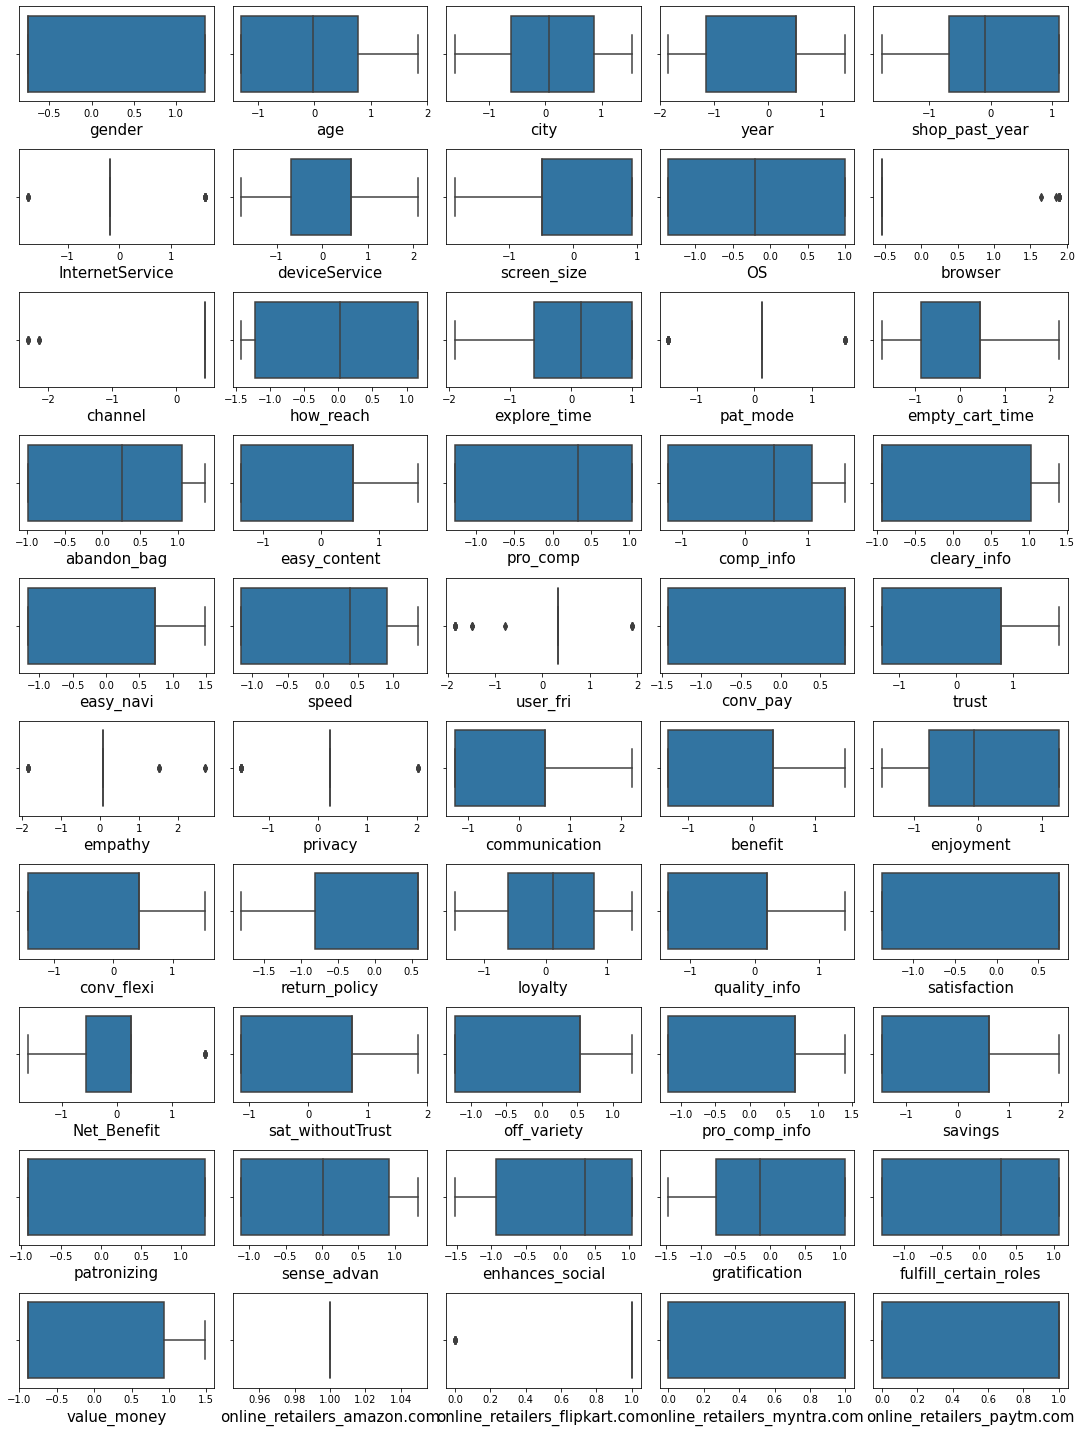

In [63]:
# Distribution after removing outliers
plt.figure(figsize=(15,20))
plotnumber=1
for column in data1:
    if plotnumber<=50:
        ax=plt.subplot(10,5,plotnumber)
        sns.boxplot(data1[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

Now after removing outliers data looks good lets move further to check the multicolinarity by using heat map 

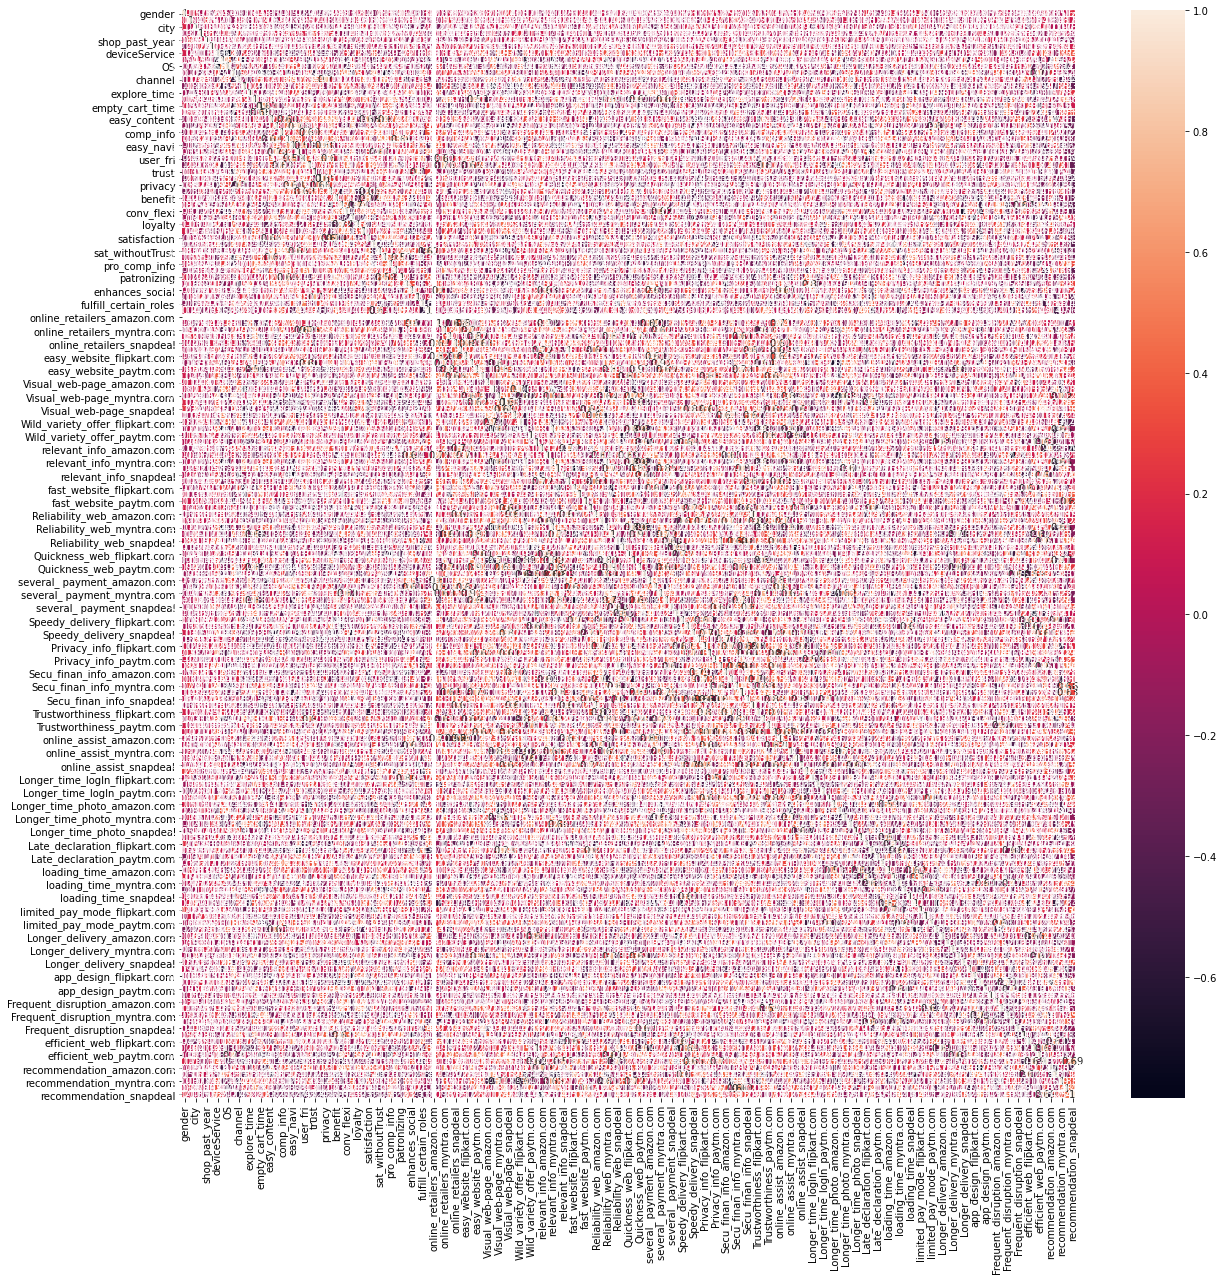

In [64]:
#check multicolinearity
myFig=plt.figure(figsize=(20,20))
sns.heatmap(data1.corr(),annot=True,annot_kws={'size':10})
plt.show()

In [65]:
# Save the Image
myFig.savefig("mycustomer.svg",format="svg")

As we see there is no multicolinirity from the graph and it is very much dificut to understand from the graph so lets check it by using VIF

In [66]:
# Lets define the features
x=data1

In [67]:
# data stadardization
scale=StandardScaler()
x_scaled=scale.fit_transform(x)

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["featurs"]=x.columns
vif

vif                      featurs
0    1.766017                       gender
1    1.541821                          age
2    1.668460                         city
3    1.469839                         year
4    1.687918               shop_past_year
..        ...                          ...
160       inf    recommendation_amazon.com
161       inf  recommendation_flipkart.com
162       inf    recommendation_myntra.com
163       inf     recommendation_paytm.com
164       inf      recommendation_snapdeal

[165 rows x 2 columns]

In [72]:
# Lets make thumb rule we can drop the columns if VIF values are more than the 10 pvalue
index=np.where(vif['vif']>10)
vif.loc[index]

vif                      featurs
6    17.450579                deviceService
7    14.132341                  screen_size
8    15.748135                           OS
9          inf                      browser
10         inf                      channel
..         ...                          ...
160        inf    recommendation_amazon.com
161        inf  recommendation_flipkart.com
162        inf    recommendation_myntra.com
163        inf     recommendation_paytm.com
164        inf      recommendation_snapdeal

[158 rows x 2 columns]

From above table we can see the pvalues of deviceService, screen_size & OS has more than 10 so lets drop them and select the others best features.

In [73]:
# Select rest features than above columns
x=data1.drop(columns=['deviceService','screen_size','OS'])

In [74]:
# data stadardization again 
scale=StandardScaler()
x_scaled=scale.fit_transform(x)

In [75]:
x_scaled

array([[-0.73854895, -1.28834833, -0.62252563, ...,  1.47901995,
        -0.47845132, -0.2270383 ],
       [-0.73854895, -1.28834833,  0.05973283, ...,  1.47901995,
         2.09007681, -0.2270383 ],
       [ 1.3540064 , -1.28834833,  0.61571038, ..., -0.6761234 ,
        -0.47845132, -0.2270383 ],
       ...,
       [-0.73854895,  1.834624  , -0.26008165, ..., -0.6761234 ,
        -0.47845132, -0.2270383 ],
       [ 1.3540064 , -0.01729119, -1.05155264, ..., -0.6761234 ,
        -0.47845132, -0.2270383 ],
       [-0.73854895, -1.28834833, -1.60884707, ...,  1.47901995,
        -0.47845132, -0.2270383 ]])

# Now our data is ready to build the model